## Activity 6 
## Prework

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


In [17]:
clean_df = pd.read_csv('Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

##Hint: use the file Create Data_Marketing_Customer_Analysis_Round3.csv

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that ### you created in Activity 4. ( Hint: check Dropfirst option).
### for the first iteration, we will focus on the numericals data (numericals data frame) as ##our data source.
### remove the outliers from the numerical columns.
### check if there are highly correlated features and drop them if there are any.
### X-y split (y is the target variable which is the total claim amount)

In [18]:
clean_df.columns

Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [19]:
numerical = clean_df.select_dtypes('int64') # asign numerics to new object
categoricals = clean_df.select_dtypes('object')

## Hot coding of categorical  vars

In [22]:
categoricals.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
# Delete date column
categoricals =categoricals.drop('effective_to_date',1)

# Dont use in place here df.drop('a', axis=1, inplace=True) 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_19888/3229202658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categoricals =categoricals.drop('effective_to_date',1)


In [32]:
#Table of features
categoricals_features= categoricals.select_dtypes("object")
categoricals_features


,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [33]:

cat_dic_cols =OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
cat_dic_cols

array(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master', 'month_jan',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed',
       'gender_m', 'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single',
       'policy_type_personal auto', 'policy_type_special auto',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3',
       'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury car', 'vehicle_cla

## Delete Outliers

In [35]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1


numerical_no_out = numerical[~((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
## Check if numerical and numerical_no_out are different

numerical.info()
numerical_no_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Unnamed: 0                     10689 non-null  int64
 1   customer_lifetime_value        10689 non-null  int64
 2   income                         10689 non-null  int64
 3   monthly_premium_auto           10689 non-null  int64
 4   months_since_last_claim        10689 non-null  int64
 5   months_since_policy_inception  10689 non-null  int64
 6   number_of_open_complaints      10689 non-null  int64
 7   number_of_policies             10689 non-null  int64
 8   total_claim_amount             10689 non-null  int64
dtypes: int64(9)
memory usage: 751.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 1 to 10685
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         -------------

## Check for correlation

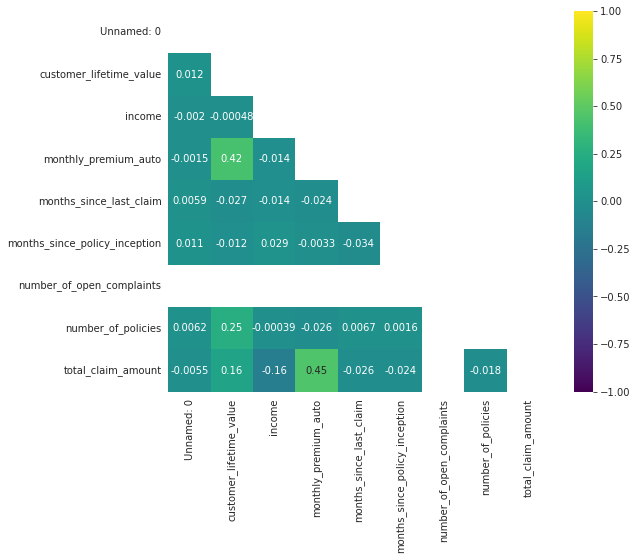

In [15]:
# Check for correlation

corr = numerical_no_out.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(9, 7)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

## Split x and y - I dont understand the question? I this supposed to be for supervised leaning?


In [39]:
### GLM 

numerical_no_out.columns



Index(['Unnamed: 0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [44]:
#X = numerical_no_out['income']
#y = numerical_no_out['total_claim_amount']
#lm = LinearRegression()
#lm.fit(X, y)

x = numerical_no_out['income']
y = numerical_no_out['total_claim_amount']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)



In [37]:
X=numerical_no_out.drop('target_d', axis=1)
y=numerical_no_out.target_d

KeyError: "['target_d'] not found in axis"

In [21]:
X=X._get_numeric_data()
X

NameError: name 'X' is not defined